In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt

csv_file_path = 'Metadata.csv'
df = pd.read_csv(csv_file_path)

df_copy = df.head(100).copy()

# Check if the image file exists in the file system
def image_exists(image_path):
    return os.path.exists("Images/" + image_path)

# Drop columns where images do not exist
df_copy = df_copy.dropna(subset=['IMGName1', 'IMGName2', 'IMGName3'])
df_copy = df_copy[df_copy['IMGName1'].apply(image_exists) & df_copy['IMGName2'].apply(image_exists) & df_copy['IMGName3'].apply(image_exists)]




In [40]:
from imageai.Classification import ImageClassification
import os
import re

execution_path = os.getcwd()

prediction = ImageClassification()
prediction.setModelTypeAsDenseNet121()
prediction.setModelPath(os.path.join(execution_path, "densenet121-a639ec97.pth"))
prediction.loadModel()

def classify_image(image_path):
    pattern = r"(?<=_)\d+(?=_)"
    replacement = "{}"

    if not isinstance(image_path, str):
        return "No Result"

    image = re.sub(pattern, replacement, image_path, count=1)
    image = "Images/" + image

    image_summary = {}

    for i in range(1, 3):
        if os.path.exists(image.format(i))!=True:
            return "No Result";
        
        predictions, probabilities = prediction.classifyImage(os.path.join(execution_path, image.format(i)), result_count=5 )
        for eachPrediction, eachProbability in zip(predictions, probabilities):
            if eachPrediction in image_summary:
                image_summary[eachPrediction] += eachProbability
            else:
                image_summary[eachPrediction] = eachProbability


    #sorted_image_summary = dict(sorted(image_summary.items(), key=lambda x: x[1], reverse=True))

    max_key = max(image_summary, key=lambda k: image_summary[k])
    if not isinstance(max_key, str):
        return "No Result"
    return max_key


df_copy['predictedClothingType'] = df_copy['IMGName1'].apply(classify_image)

df_copy.to_csv('Metadata100Labeled.csv', index=False)



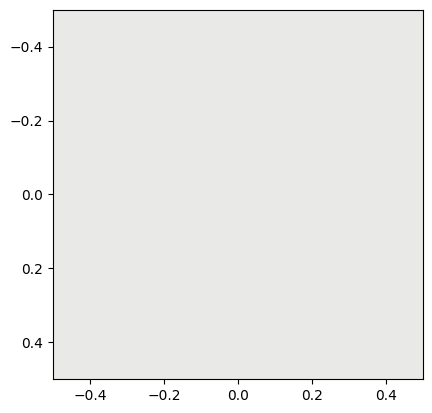

In [48]:
import colorthief

def get_dominant_color(image_path):
    color_thief = colorthief.ColorThief(image_path)
    dominant_color = color_thief.get_color(quality=1)
    return dominant_color

def get_palette(image_path):
    color_thief = colorthief.ColorThief(image_path)
    palette = color_thief.get_palette(color_count=5)
    return palette

plt.imshow([[get_dominant_color('Images/1_1_2024_V_0_3.jpg')]])
#plt.imshow([get_palette('Images/1_1_2024_V_0_3.jpg')[i] for i in range(5)])
plt.show()



In [76]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import cv2

def preprocess_image(image):
    image = image[int(image.shape[0] * 0.25):int(image.shape[0] * 0.75), int(image.shape[1] * 0.25):int(image.shape[1] * 0.75)]

    height, width = image.shape[:2]
    new_width = int(width / 4)
    new_height = int(height / 4)

    resized_image = cv2.resize(image, (new_width, new_height))

    pixels = resized_image.reshape((-1, 3))
    pixels = np.float32(pixels)
    return pixels

def get_dominant_colors(pixels, k=3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

def display_dominant_colors(dominant_colors):
    bar = np.zeros((50, 300, 3), dtype=np.uint8)
    startX = 0
    for color in dominant_colors:
        endX = startX + (300 // len(dominant_colors))
        cv2.rectangle(
            bar, (int(startX), 0), (int(endX), 50), color.astype(int).tolist(), -1
        )
        startX = endX

    cv2.imshow("Dominant Colors", bar)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def save_all_dominant_colors():
    num_colors = 5
    preprocessed_images = []

    for index, row in df_copy.head(100).iterrows():
        image_path = "Images/" + row['IMGName1']
        image = cv2.imread(image_path)
        preprocessed_image = preprocess_image(image)
        preprocessed_images.append(preprocessed_image)

    df_copy['dominantColors'] = [get_dominant_colors(image, k=num_colors) for image in preprocessed_images]

    df_copy.to_csv('Metadata100LabeledAndColor.csv', index=False)

df_copy.dropna(inplace=True)

save_all_dominant_colors()


0_1_2024_V_0_3.jpg
1_1_2024_V_0_3.jpg
2_1_2024_V_0_1.jpg
3_1_2024_V_0_2.jpg
4_1_2024_V_0_2.jpg
5_1_2024_V_0_2.jpg
6_1_2023_I_0_3.jpg
8_1_2024_V_0_1.jpg
10_1_2024_V_0_3.jpg
11_1_2024_V_0_1.jpg
12_1_2023_I_1_3.jpg
13_1_2024_V_1_3.jpg
15_1_2023_I_0_3.jpg
16_1_2024_V_0_3.jpg
17_1_2023_V_0_3.jpg
19_1_2024_V_0_1.jpg
21_1_2024_V_0_2.jpg
22_1_2024_V_0_1.jpg
23_1_2024_V_0_2.jpg
24_1_2024_V_0_3.jpg
25_1_2024_V_0_1.jpg
26_1_2024_V_0_1.jpg
27_1_2024_V_0_2.jpg
29_1_2024_V_0_3.jpg
30_1_2024_V_0_1.jpg
31_1_2024_V_0_3.jpg
32_1_2024_V_0_3.jpg
33_1_2024_V_0_2.jpg
34_1_2023_I_0_3.jpg
35_1_2024_V_1_1.jpg
36_1_2024_W_0_2.jpg
37_1_2024_V_0_2.jpg
38_1_2024_V_0_1.jpg
39_1_2024_V_0_1.jpg
40_1_2024_V_0_1.jpg
41_1_2024_W_1_2.jpg
43_1_2024_W_0_1.jpg
44_1_2024_V_0_1.jpg
45_1_2024_W_0_1.jpg
46_1_2024_V_0_1.jpg
47_1_2024_V_0_3.jpg
48_1_2023_V_0_3.jpg
49_1_2024_V_0_2.jpg
50_1_2023_I_0_3.jpg
51_1_2024_V_0_2.jpg
52_1_2023_I_0_3.jpg
53_1_2023_I_0_3.jpg
56_1_2024_V_0_1.jpg
57_1_2024_V_1_2.jpg
58_1_2024_V_1_1.jpg
59_1_202